In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import constants as const

In [2]:
g_2 = pd.read_csv('g_2.csv')
g_s = pd.read_csv('g_s.csv')

In [3]:
display(g_2.head())
display(g_s.head())

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,logLobs,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot
0,15983,1069,02570921+0519153,44.288391,5.32091,0.024036,11.04765,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
1,41930,1069,02533752+0603392,43.406349,6.06101,0.024890,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
2,34664,1069,02574211+0525562,44.425579,5.43222,0.024612,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
3,35170,1069,02574458+0540192,44.435841,5.67208,0.023848,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
4,42129,1069,02575838+0546592,44.493309,5.78307,0.019647,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32


,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Dist_y
0,151723,82182,1237661121851687040,50.787243,40.294140,0.014498,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
1,148781,82182,1237661121851687044,50.792912,40.299427,0.013492,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
2,151724,82182,1237661121851687072,50.852291,40.355141,0.016187,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
3,149988,82182,1237661083199734382,50.953522,40.557800,0.017263,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
4,144611,82182,1237661059574858087,51.166824,40.814262,0.017700,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,


In [4]:
g_2['Ro_0'] = astropy.coordinates.Distance(z=g_2.z_y).to('Mpc')
g_s['Ro_0'] = astropy.coordinates.Distance(z=g_s.z_y).to('Mpc')

In [5]:
def dist(ro0, angle_y, angle_x):
    return ro0*(np.tan(angle_x-angle_y))

In [6]:
g_2['oa'] = (dist(g_2.Ro_0, np.deg2rad(g_2.RAJ2000_y), np.deg2rad(g_2.RAJ2000_x))**2 + dist(g_2.Ro_0, np.deg2rad(g_2.DEJ2000_y), np.deg2rad(g_2.DEJ2000_x)))**0.5
g_s['oa'] = (dist(g_s.Ro_0, np.deg2rad(g_s.RAJ2000_y), np.deg2rad(g_s.RAJ2000_x))**2 + dist(g_s.Ro_0, np.deg2rad(g_s.DEJ2000_y), np.deg2rad(g_s.DEJ2000_x)))**0.5

In [7]:
g_2['v'] = const.c.to('km / s')*((1+g_2.z_x)**2-1)/((1+g_2.z_x)**2+1)
g_s['v'] = const.c.to('km / s')*((1+g_s.z_x)**2-1)/((1+g_s.z_x)**2+1)

In [8]:
def drawPlot(data, GrID, ax, c):
    gr = data[data.iGrID == GrID]
    ax.scatter(gr.oa, gr.v, c=c, marker='x')
    ax.set_xlabel('projection distance from center')
    ax.set_ylabel('velocity')
    ax.set_title('iGrID = %d' % (GrID))
    ax.set_ylim(top=max(gr.v)+0.1, bottom=min(gr.v)-0.1)

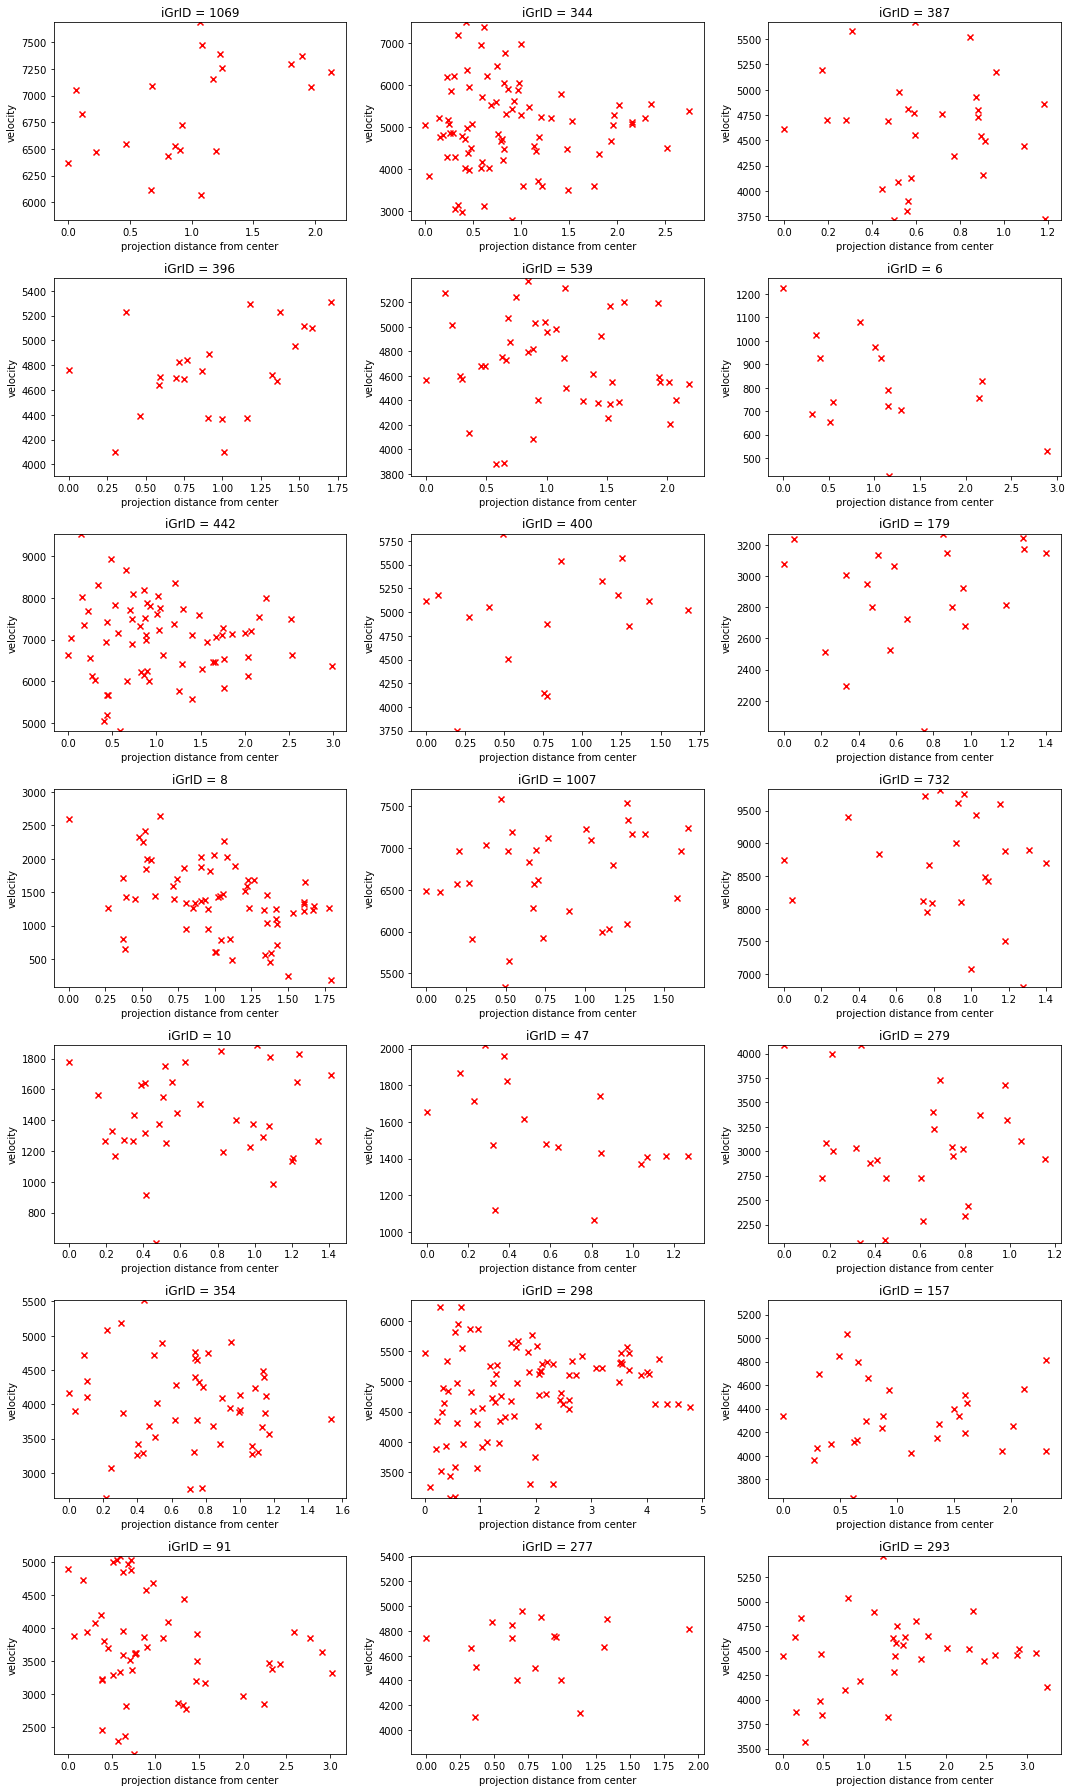

In [9]:
fig, axs = plt.subplots(7, 3, figsize=(15,25))
GrIDs = g_2.iGrID.unique()
for i in range(21):
    drawPlot(g_2, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

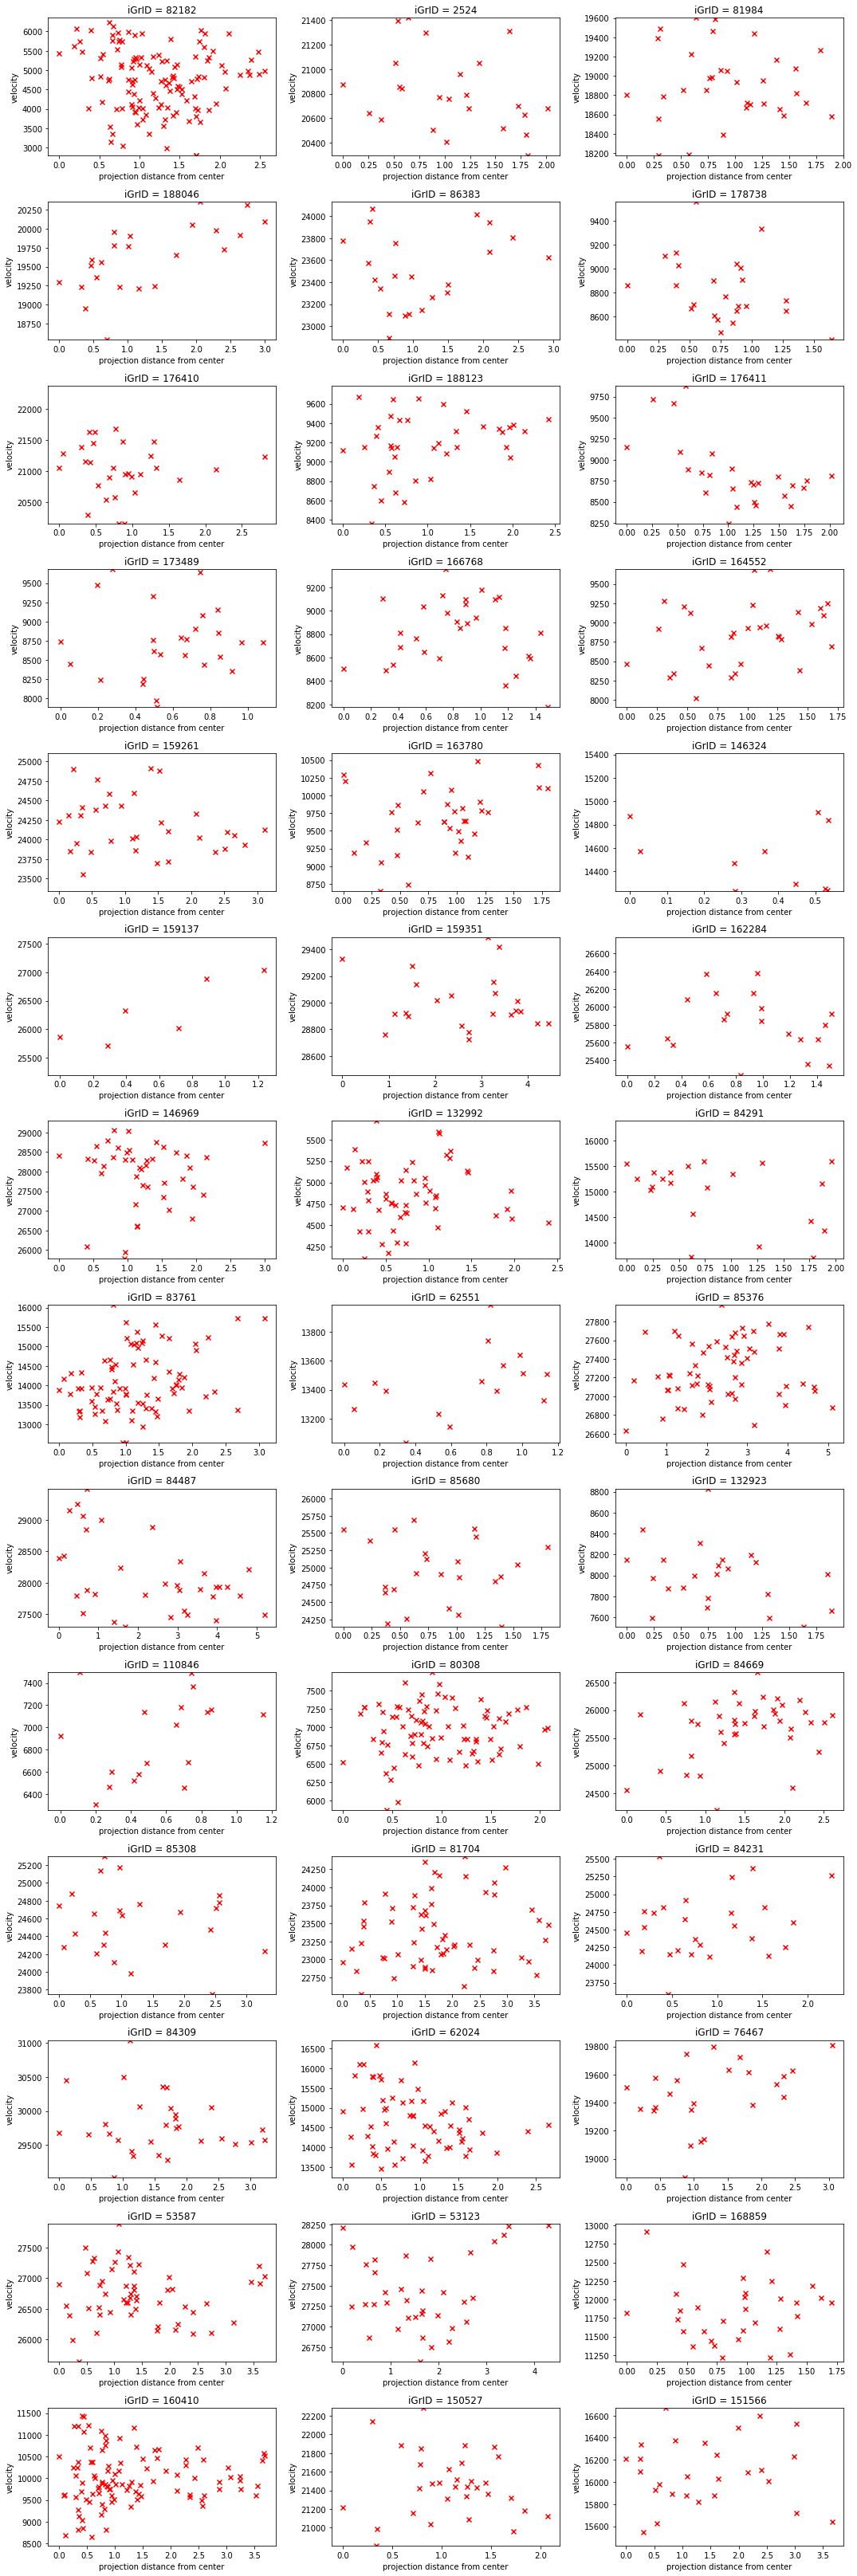

In [10]:
fig, axs = plt.subplots(14, 3, figsize=(15,45))
GrIDs = g_s.iGrID.unique()
for i in range(14*3):
    drawPlot(g_s, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

In [11]:
g_2.to_csv('g_2_with_dist.csv', index=False)
g_s.to_csv('g_s_with_dist.csv', index=False)